<a href="https://colab.research.google.com/github/PolyanskayaP/FMMRAZ_6sem/blob/main/Lab1_fmmraz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Для формирования исходных данных сгенерировать случайным образом в пространстве критериев     точек, равномерно распределенных на множестве достижимых векторных оценок, заданном системой ограничений-неравенств 

n=23

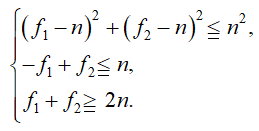

In [3]:
from numpy.lib.nanfunctions import nancumsum
from random import uniform
import numpy as np

n=23
NACH=11.5
KON=46
KOLVO=20

def get_odz(f1):
    f2=[]
    yverh, yniz = 0, 0
    f1sq = 11.5*np.sqrt(2) + 23
    if (f1 >= 11.5) and (f1 <= 23):
        yverh=23+f1
        yniz=46-f1
    elif (f1 > 23) and (f1 <= f1sq):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz=46-f1
    elif (f1 > f1sq) and (f1 <= 46):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz= - np.sqrt((23**2 - (f1-23)**2)) + 23
    f2.append(yniz)
    f2.append(yverh)
    return(f2)

def gener_f1_f2(nach, kon, kolvo):
    f1_ar = np.random.uniform(nach, kon, kolvo)  #сгенерировали массив иксов
    f2_ar = []
    for f1 in f1_ar:
        na, ko = get_odz(f1)
        f2 = uniform(na, ko)
        f2_ar.append(f2) 
    #dictionary = dict(zip(f1_ar, f2_ar))
    return(f1_ar, f2_ar)

F1, F2 = gener_f1_f2(NACH, KON, KOLVO)
print(F1)
print(F2)

[32.82302341 41.5603104  34.91781011 13.6915774  21.65750154 16.60642789
 14.02596004 33.80041788 32.95597545 17.57038108 31.8879594  36.51162815
 29.65782046 40.87610326 32.91687494 34.23986431 13.59251549 24.05656905
 29.1264929  16.68373745]
[40.18248090628305, 19.74703821955847, 20.47119080593046, 33.67867212973021, 27.97715868162123, 39.025161806896406, 36.208154694342426, 19.44586437156822, 20.567340900258472, 28.636352578454844, 38.29370083521616, 13.431515170387536, 28.037366119303837, 15.897488312076042, 32.348536208606575, 16.891615496088107, 34.9379858595252, 38.684707825362736, 18.650073319446836, 37.006544913595036]


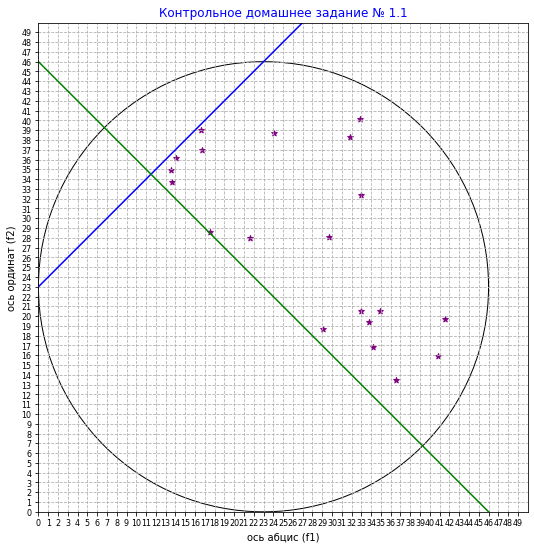

<Figure size 360x144 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((15,9)))
ax = fig.add_subplot(111) 

f1a = np.linspace(0, 50, 100)
f2a = n + f1a

f1b = np.linspace(0, 50, 100)
f2b = 2*n - f1b 

ax.scatter(F1, F2, color = 'purple', marker = '*')  #точки

cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

ax.add_artist( cc ) 

plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')  #стиль сеточки 

plt.xticks([i for i in range(50)], size=8)
plt.yticks([i for i in range(50)], size=8)

K = plt.figure() 
K.set_figwidth(5) 
K.set_figheight(2) 

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
ax.set_xlabel('ось абцис (f1)')
ax.set_ylabel('ось ординат (f2)')

ax.plot(f1a, f2a, color = 'blue')
ax.plot(f1b, f2b, color = 'green')

plt.show()

2.	Определить множество эффективных проектов с помощью алгоритма исключения заведомо неэффективных решений.

In [5]:
def find_pareto(f1_ar, f2_ar):
    for f1, f2 in zip(f1_ar, f2_ar):
        print(f1, f2) 

find_pareto(F1, F2)

32.82302340683849 40.18248090628305
41.56031040137731 19.74703821955847
34.91781011111516 20.47119080593046
13.691577398827128 33.67867212973021
21.657501540091026 27.97715868162123
16.606427894687165 39.025161806896406
14.025960040672985 36.208154694342426
33.80041787987528 19.44586437156822
32.955975454357144 20.567340900258472
17.570381075245848 28.636352578454844
31.88795939692073 38.29370083521616
36.511628148275875 13.431515170387536
29.657820459440703 28.037366119303837
40.876103258454094 15.897488312076042
32.91687493646 32.348536208606575
34.23986430960032 16.891615496088107
13.592515490243844 34.9379858595252
24.056569047361556 38.684707825362736
29.12649289731199 18.650073319446836
16.68373744770785 37.006544913595036
